# Imports

In [1]:
from sklearn.model_selection import train_test_split
from pycm import ConfusionMatrix
from pandas.plotting import scatter_matrix, andrews_curves, parallel_coordinates
from sklearn.metrics import median_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import contingency_matrix
from sklearn.pipeline import Pipeline
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import numpy as np
import os
import pandas as pd
import random
from IPython.display import Markdown, display, clear_output
import os 
%matplotlib inline
os.environ['OMP_NUM_THREADS']='16'

def printmd(string):
    display(Markdown(string))

# Importing the csv files

Importing the dataset and storing it in a variable called data

In [2]:
data = pd.read_csv('./data/data.csv')

# Data Exploration

# This dataset as 21 features and 2000 entries. The meanings of the features are given below:

- battery_power: Total energy a battery can store in one time measured in mAh
- blue: Has bluetooth or not
- clock_speed: speed at which microprocessor executes instructions
- dual_sim: Has dual sim support or not
- fc: Front Camera mega pixels
- four_g: Has 4G or not
- int_memory: Internal Memory in Gigabytes
- m_dep: Mobile Depth in cm
- mobile_wt: Weight of mobile phone
- n_cores: Number of cores of processor
- pc: Primary Camera mega pixels
- px_height: Pixel Resolution Height
- px_width: Pixel Resolution Width
- ram: Random Access Memory in Mega Byte
- sc_h: Screen Height of mobile in cm
- sc_w: Screen Width of mobile in cm
- talk_time: longest time that a single battery charge will last when you are
- three_g: Has 3G or not
- touch_screen: Has touch screen or not
- wifi: Has wifi or not
- price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [3]:
print(data.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [4]:
data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [5]:
data.shape

(2000, 21)

In [6]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

The above info reveals that all attributes are numerical i.e. either float or int

In [7]:
data.describe() 

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

The above show some basic metrics for each feature in our dataset

In [8]:
for feature in data.columns:
    mean = data[feature].mean()
    std = data[feature].std()
    treshold = std * 3
    
    lower_bound = mean - treshold
    upper_bound = mean + treshold
    
    data = data[(data[feature] > lower_bound) & (data[feature] < upper_bound)]

In [9]:
data.shape

(1988, 21)

In [10]:
bool_cols = [col for col in data if 
               data[col].dropna().value_counts().index.isin([0,1]).all()]

In [11]:
data.drop(bool_cols, inplace=True, axis=1)

In [12]:
data.shape

(1988, 15)

## Cleaning the Data

In [13]:
# To check for missing values
data.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

In [14]:
# calculate the sum of duplicate rows
print(data.duplicated().sum())

0


The above results show that there are no null/duplicate values in the data set, also all values are numeric.

However, on further inspection of the data, I found out that some values for features like px_height (height of phone in pixels) and sc_w (width of the screen) were 0 which didn't really make sense, therefore, I decided to replace these "0" values with the median of the feature.

In [15]:
data[data['px_height'] == 0]

battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  \
1481           1834          2.1   7          40    0.1         99        4   
1933            897          2.0   3           2    0.6        154        8   

      pc  px_height  px_width   ram  sc_h  sc_w  talk_time  price_range  
1481  11          0      1987  3692    13     0         16            3  
1933  10          0       994  1958     7     5          7            1

In [16]:
data['sc_w'].median()

5.0

In [17]:
data[data['sc_w'] == 0]

battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  \
12             1815          2.8   2          33    0.6        159        4   
24              503          1.2   5           8    0.4        111        3   
33             1310          2.2   0          51    0.6        100        4   
42             1253          0.5   5           5    0.2        152        2   
50             1547          3.0   2          14    0.7        198        3   
...             ...          ...  ..         ...    ...        ...      ...   
1918            772          1.0   0          23    0.6         97        7   
1920            591          0.5   1          16    0.9         90        6   
1946            590          1.2   0          32    0.4        141        6   
1954            686          2.7   0          36    0.1        194        4   
1981           1454          2.6   8           6    0.4        199        3   

      pc  px_height  px_width   ram  sc_h  sc_w  talk_time  price_range  
12    17        607       748  1482    18     0          2            1  
24    13        201      1245  2583    11     0         12            1  
33     0        178      1919  3845     7     0         12            3  
42    19        685       714  1878    15     0          4            1  
50    19       1042      1832  2059     5     0         15            2  
...   ..        ...       ...   ...   ...   ...        ...          ...  
1918  11        317      1805  2782     7     0         17            2  
1920  17        892      1603  3746     5     0          5            3  
1946   1        227       509  1817    10     0          6            0  
1954   1         64       745  1503    10     0         13            0  
1981  20        698      1018  1300    10     0          2            1  

[180 rows x 15 columns]

In [18]:
data[data['sc_w'] == 0].shape[0]

180

There are 180 rows in the dataset where the sc_w feature is 0, therefore, I replaced these values with the median of the feature.

In [19]:
data['sc_w'] = data['sc_w'].replace(0,data['sc_w'].mean())

In [20]:
data[data['sc_w'] == 0].shape[0]

0

In [21]:
data['px_height'].median()

564.0

In [22]:
data[data['px_height'] == 0].shape[0]

2

There are 2 rows in the dataset where the px_height feature is 0, therefore, I replaced these values with the median of the feature.

In [23]:
data['px_height'] = data['px_height'].replace(0,data['px_height'].median())

In [24]:
data[data['px_height'] == 0].shape[0]

0

In [25]:
data.reset_index(inplace=True, drop=True)

# Clustering

## The following function is used to automate the process of clustering and plotting the results

In [26]:
def evaluate_clustering(data, algorithm, x, y, iteration_range=range(2, 11), show_plots=False, verbose=0, random_state=42, drop=['price_range']):

    def clustering(data, x, y, n_clusters, show_plot=False, verbose=0):
        clustering_results = algorithm(
            n_clusters=n_clusters, random_state=random_state, verbose=verbose).fit(data)
        plot_data = data.copy()
        plot_data['cluster'] = clustering_results.labels_
        centroids = clustering_results.cluster_centers_
        if show_plot:
            plt.figure(figsize=(8, 8))
            sns.scatterplot(data=plot_data, x=x, y=y,
                            hue='cluster', alpha=0.7, palette='Set2')
            plt.xlabel(x)
            plt.ylabel(y)
            plt.title(f'{algorithm.__name__} Clustering K = {n_clusters}')
            colors = sns.color_palette('Set2',max(iteration_range)).as_hex()
            for i in range(n_clusters):
                plt.scatter(clustering_results.cluster_centers_[:, data.columns.tolist().index('ram')][i],
                            clustering_results.cluster_centers_[:, data.columns.tolist().index('battery_power')][i], 
                            marker='o', s=200, c=colors[i], label='centroid', edgecolors= "black")
            plt.show()
        return clustering_results

    X = data.drop(columns=drop)

    clustering_results_list = [clustering(
        data=X, x=x, y=y, n_clusters=i, show_plot=show_plots, verbose=0) for i in iteration_range]

    inertia_list = [
        clustering_results.inertia_ for clustering_results in clustering_results_list]

    labels_list = [
        clustering_results.labels_ for clustering_results in clustering_results_list]

    plt.figure(figsize=(10, 5))
    plt.plot(iteration_range, inertia_list, '-o')
    plt.xlabel('Value of K (Number of clusters)')
    plt.ylabel('Squared Error (Cost)')
    plt.title(f'Elbow method for {algorithm.__name__}')
    plt.show()

    silhouette_score_list = []

    for k in iteration_range:
        clustering_results = algorithm(
            n_clusters=k, random_state=random_state, verbose=verbose).fit(X)
        labels = clustering_results.labels_
        silhouette_score_list.append(
            silhouette_score(X, labels, metric='euclidean'))

    plt.figure(figsize=(10, 5))
    plt.plot(iteration_range, silhouette_score_list, '-o')
    plt.show()

    return {'inertia_list': inertia_list, 'labels_list': labels_list, 'clustering_results_list': clustering_results_list, 'silhouette_score_list': silhouette_score_list}


def find_optimal_cluster_number(data, algorithm, iteration_range=range(2, 11), verbose=0, random_state=42, drop=['price_range']):
    current_highest_rand_score = 0
    K = 0
    X = data.drop(columns=drop)
    y = data['price_range']
    for n_clusters in iteration_range:
        if algorithm.__name__ == 'AgglomerativeClustering':
            clustering_results = algorithm(
                n_clusters=n_clusters, linkage='ward').fit(X)
            y_pred = clustering_results.labels_
        else:
            clustering_results = algorithm(
                n_clusters=n_clusters, random_state=random_state, verbose=verbose).fit(X)
            y_pred = clustering_results.predict(X)

        labels = clustering_results.labels_
        if metrics.rand_score(y_pred, y) > current_highest_rand_score:
            current_highest_rand_score = metrics.rand_score(y_pred, y)
            K = n_clusters
            clear_output(wait=True)
            printmd(
                f'# Current highest rand score is {current_highest_rand_score:.4f} when K={n_clusters} for {algorithm.__name__}')
            print(
                f'Silhouette Score: {silhouette_score(X, labels, metric = "euclidean")}')
            print(f'Homogeneity Score: {metrics.homogeneity_score(y, y_pred)}')
            print(
                f'Completeness Score: {metrics.completeness_score(y, y_pred)}')
            print(f'V-measure Score: {metrics.v_measure_score(y, y_pred)}')
            print(
                f'Adjusted Rand Score: {metrics.adjusted_rand_score(y, y_pred)}')
            print(
                f'Adjusted Mutual Info Score: {metrics.adjusted_mutual_info_score(y, y_pred)}')
            print(
                f'Silhouette Coefficient: {metrics.silhouette_score(X, y_pred, metric = "euclidean")}')
            print(
                f'Davies-Bouldin Index: {metrics.davies_bouldin_score(X, y_pred)}')
            print(f'Rand Score: {metrics.rand_score(y, y_pred)}')
            print(
                f'Calinski-Harabasz index: {metrics.calinski_harabasz_score(X, labels)}')
            print(
                f'Fowlkes-Mallows score: {metrics.fowlkes_mallows_score(y_pred, y)}')

    printmd(f'## The best K is {K} for {algorithm.__name__}')
    return K, X, y, y_pred


Reference: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

## To evaluate the clustering performance, we calculate the following metrics:

### 1)The Rand Index
#### The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
#### The Rand Index is a measure of the similarity and diversity of clusterings.
#### The higher the Rand Index, the more similar and distinct the clusterings are.
#### The Rand Index is also a measure of reproducibility and is comparable to other clusterings.
#### The Rand Index is closely related to the adjusted Rand Index.

### 2)Silhouette Score
#### The Silhouette Coefficient is a measure of how well samples are clustered. It ranges from -1 to +1, where a value close to +1 indicates that all samples in a given cluster are far away from each other.
#### The Silhouette Coefficient is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
#### The Silhouette Coefficient is lower when clusters are sparser and less separated, which relates to a non-standard concept of a cluster.
#### The Silhouette Coefficient is the average of the Silhouette Coefficient for each sample.

### 3)Calinski-Harabasz Index
#### The Calinski-Harabasz index also known as the Variance Ratio Criterion, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, the higher the score , the better the performances.
#### The Calinski-Harabasz index is a measure of how well the samples are clustered.

### 4)Silhouette Coefficient
#### The Silhouette Coefficient is defined for each sample and is composed of two scores(shown in below), and a higher Silhouette Coefficient score relates to a model with better defined clusters.
#### The first score is the mean distance between a sample and all other points in the same cluster.

### 5)Davies-Bouldin Index
#### If the ground truth labels are not known, the Davies-Bouldin index (sklearn.metrics.davies_bouldin_score) can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters. This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

### 6)Homogeneity Score
#### The homogeneity score is defined as the number of clusters that have a uniform distribution of samples.
#### The higher the homogeneity score, the better the clustering.

### 7)Completeness Score
#### The completeness score is defined as the number of clusters that contain all samples.
#### The higher the completeness score, the better the clustering.

### 8)V-measure
#### The V-measure is the harmonic mean between homogeneity and completeness: V = 2 * (homogeneity * completeness) / (homogeneity + completeness)
#### The higher the V-measure, the better the clustering.

### 9)Adjusted Rand Index
#### The Adjusted Rand Index (ARI) is the average of the Rand Index values for each cluster.
#### The ARI is a measure of the ‘randomness’ of the clustering.
#### The ARI is the average of the Rand Index values for each cluster.

### 10)Adjusted Mutual Information Score
#### The Adjusted Mutual Information (AMI) is the average of the Mutual Information values for each cluster.
#### The AMI is a measure of the ‘randomness’ of the clustering.


# K-Means Clustering

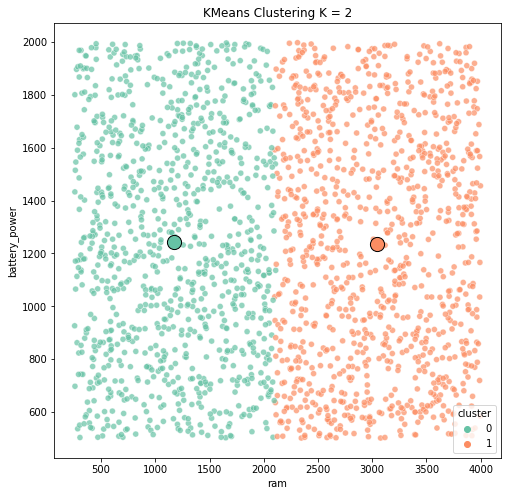

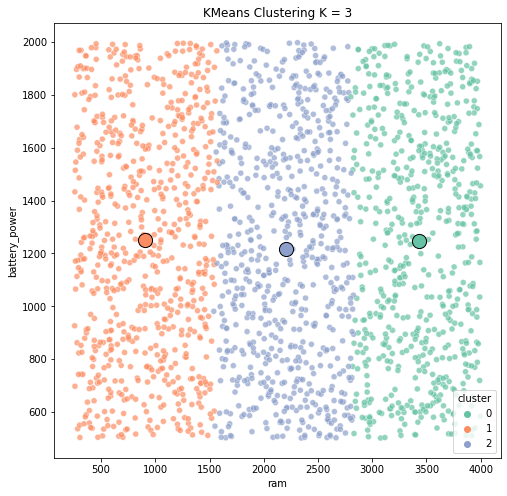

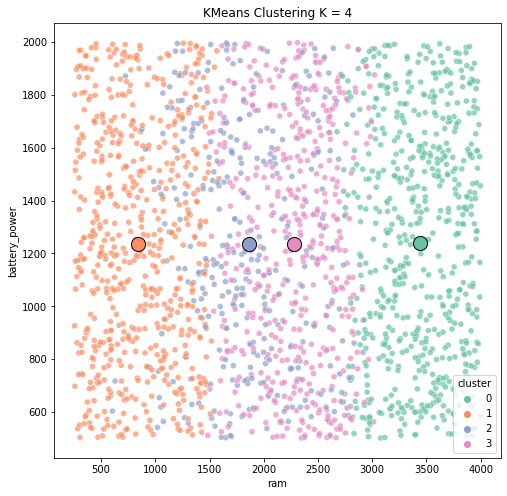

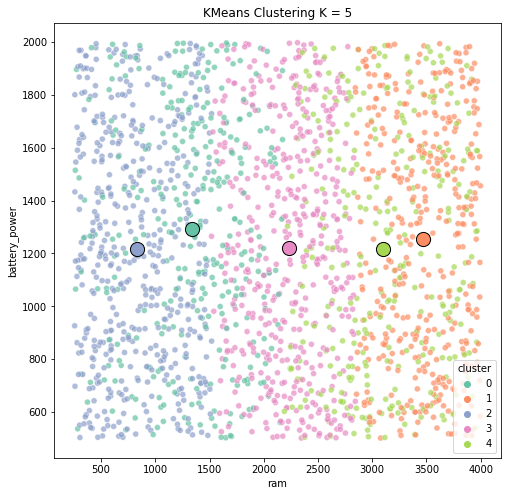

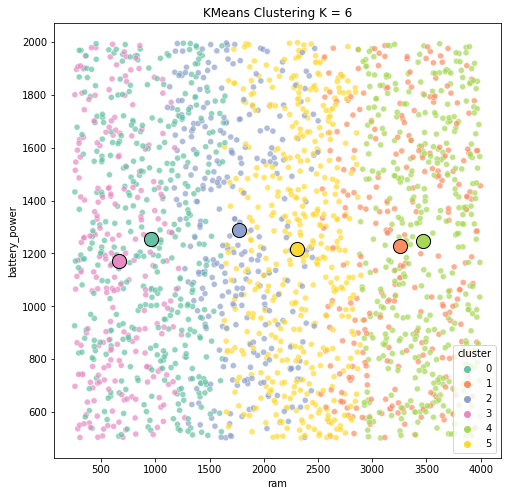

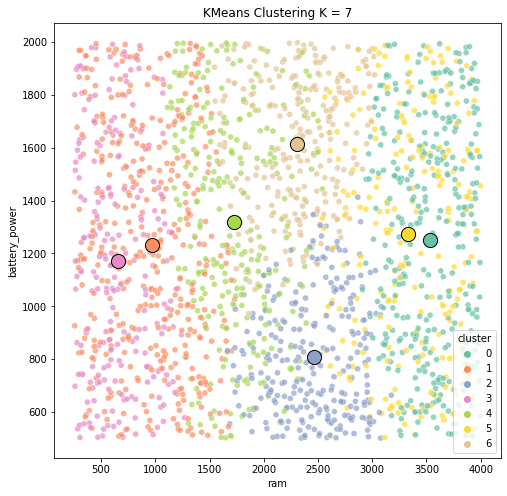

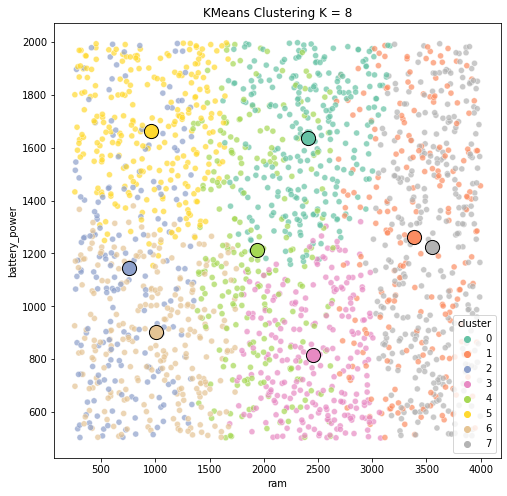

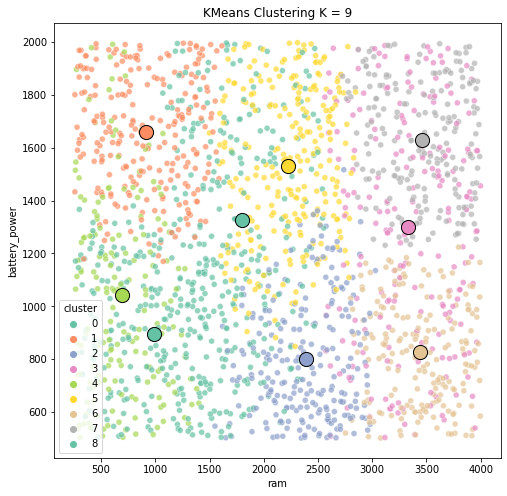

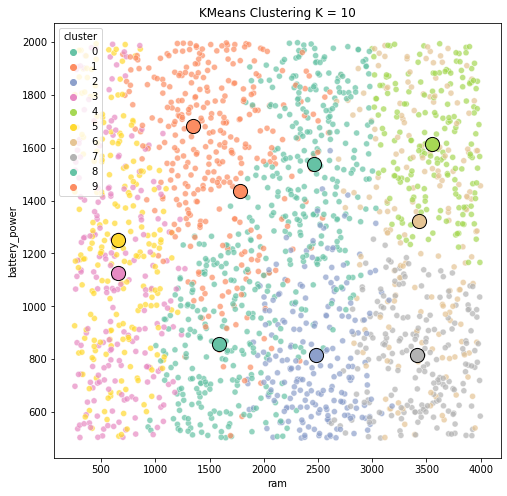

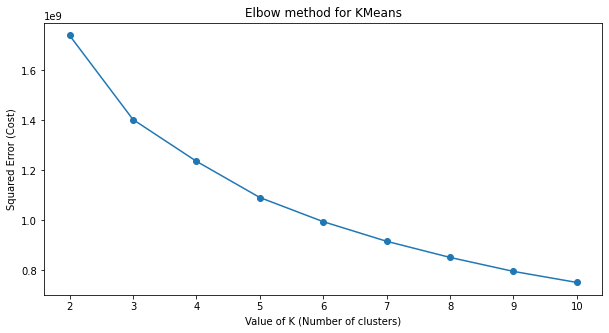

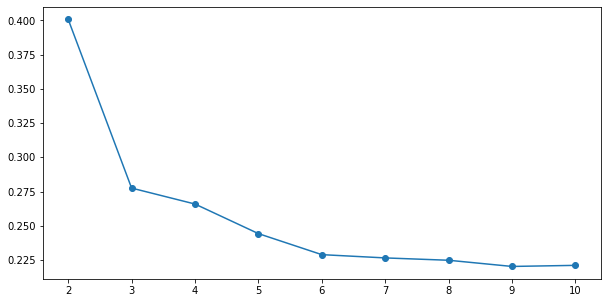

In [27]:
kmeans_results = evaluate_clustering(data, KMeans, 'ram', 'battery_power', show_plots=True)

## In the plot above using the elbow method we can see it has its elbow around 4 or 5 but it is not clear which cluster to choose. So, I decided to use the silhouette method to find the optimal number of clusters.

## The second plot is using the silhouette score to find the optimal k for this dataset. The silhouette score is the average distance between a data point and its neighboring clusters. The silhouette score is high for the data points that are far away from the nearest cluster. The silhouette score is low for the data points that are close to the nearest cluster.
## From the graph, the optimal k for this dataset is 6.

In [28]:
K, X, y, y_pred = find_optimal_cluster_number(data, KMeans, range(2,11))

# Current highest rand score is 0.7963 when K=4 for KMeans

Silhouette Score: 0.2658474995575887
Homogeneity Score: 0.4994941261488084
Completeness Score: 0.5096219750501162
V-measure Score: 0.5045072272485883
Adjusted Rand Score: 0.46555287443769705
Adjusted Mutual Info Score: 0.5036868522390532
Silhouette Coefficient: 0.2658474995575887
Davies-Bouldin Index: 1.2706445766315437
Rand Score: 0.7963118418614353
Calinski-Harabasz index: 1201.4288757956103
Fowlkes-Mallows score: 0.6025355579106954


## The best K is 4 for KMeans

## By using the method I created that automatically keeps track of the highest rand score for  K values in a given range, we can see that the optimal k is 4.

In [29]:
# This code takes a long time to run therefore I saved the result and just display the graph
# kmeans = KMeans(n_clusters=3, random_state=42, init="k-means++", max_iter=1000, n_init=20, verbose=1).fit(X)
# plot_data = data.copy()
# plot_data['cluster'] = kmeans.labels_
# plt.figure(figsize=(5,5))
# sns.pairplot(data=plot_data, hue='cluster', palette='Set2')
# plt.title(f'K-Means Clustering K = {3}')
# plt.show()

### This is the result from running the above code.
<img src="./big_plot.png" alt="big plot">

In [30]:
contingency_matrix(y, y_pred)

array([[  0,  28,   0, 160,   0, 212,   0,   0,  96,   0],
       [ 55, 137,  73,  43,   0,   0,   0,   5, 116,  68],
       [173,  11, 123,   0,  11,   0,   4, 101,   0,  74],
       [ 29,   0,  10,   0, 175,   0, 175,  94,   0,  15]], dtype=int64)

In [31]:
X['cluster'] = KMeans(n_clusters=K, random_state=0, init="k-means++", max_iter=1000, n_init=20).fit(X).labels_

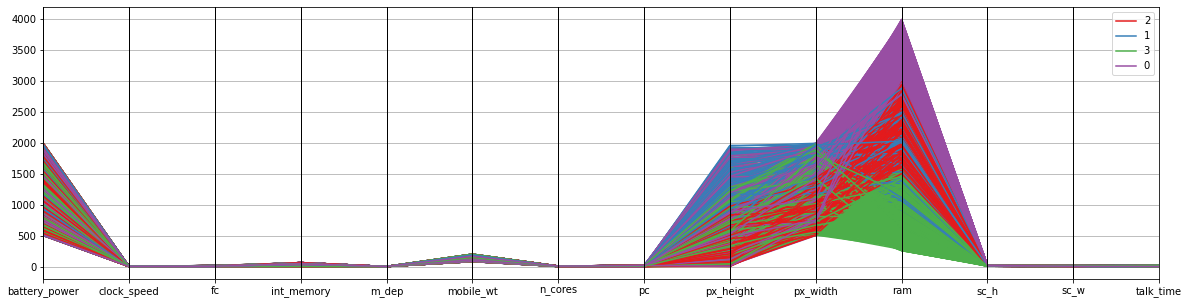

In [32]:
plt.figure(figsize=(20,5))
pd.plotting.parallel_coordinates(X, 'cluster', color=['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf'])
plt.show()

## The following sillouette score plot is the result of running the code below. When the silhouette coefficient crosses the average line (red dotted line in the graphs) it means that it is suitable for the given number of clusters.

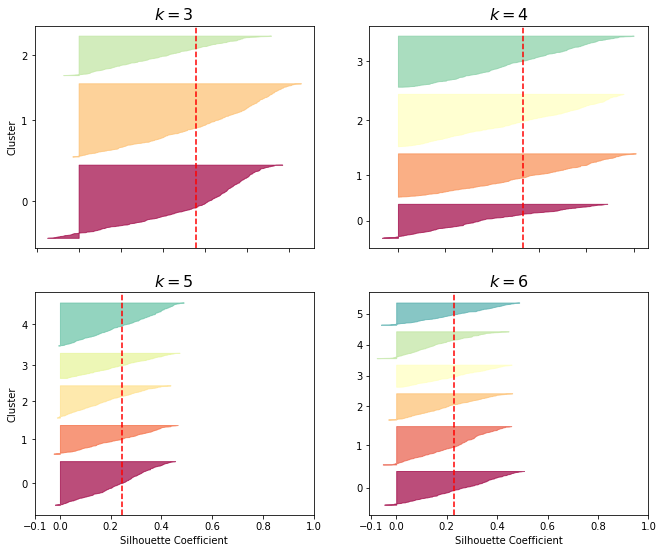

In [33]:
plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_results['clustering_results_list'][k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=kmeans_results['silhouette_score_list'][k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

From the above results we can infer that the optimal number of clusters is 4.

## I used a pipeline to combine clustering and classification. This is purely for the sake of testing new things. I used the following pipeline:

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

current_max = 0
best_cluster_count = 0

for n_clusters in range(2,20):
    pipeline = Pipeline(
        [
            ("kmeans", KMeans(n_clusters=n_clusters, random_state=42)),
            ("gaussiannb", GaussianNB())
        ]
    )
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    printmd(f'## for K = {n_clusters} the accuracy is => {score:.4f}')
    if score > current_max:
        clear_output(wait=True)
        current_max = score
        best_cluster_count = n_clusters
        printmd(f'# Current best score is {score:.2f} for {n_clusters} clusters')
        y_pred = pipeline.predict(X_test)

        print(f'Accuracy score: {metrics.accuracy_score(y_test, y_pred)}')
        print(f'Precision score: {metrics.precision_score(y_test, y_pred, average="macro")}')
        print(f'Recall score: {metrics.recall_score(y_test, y_pred, average="macro")}')
        print(f'F1 score: {metrics.f1_score(y_test, y_pred, average="macro")}')

        print(f'Confusion matrix: \n{metrics.confusion_matrix(y_test, y_pred)}')

        print(f'Classification report: \n{metrics.classification_report(y_test, y_pred)}')

# Current best score is 0.83 for 10 clusters

Accuracy score: 0.8269617706237424
Precision score: 0.8259042004924982
Recall score: 0.8280686081198623
F1 score: 0.8268591213240843
Confusion matrix: 
[[122  17   0   0]
 [ 18  87  18   0]
 [  0  15  98  11]
 [  0   0   7 104]]
Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       139
           1       0.73      0.71      0.72       123
           2       0.80      0.79      0.79       124
           3       0.90      0.94      0.92       111

    accuracy                           0.83       497
   macro avg       0.83      0.83      0.83       497
weighted avg       0.83      0.83      0.83       497



## for K = 11 the accuracy is => 0.8209

## for K = 12 the accuracy is => 0.8129

## for K = 13 the accuracy is => 0.8249

## for K = 14 the accuracy is => 0.8169

## for K = 15 the accuracy is => 0.8229

## for K = 16 the accuracy is => 0.8209

## for K = 17 the accuracy is => 0.8209

## for K = 18 the accuracy is => 0.8229

## for K = 19 the accuracy is => 0.8270

# Mini Batch KMeans

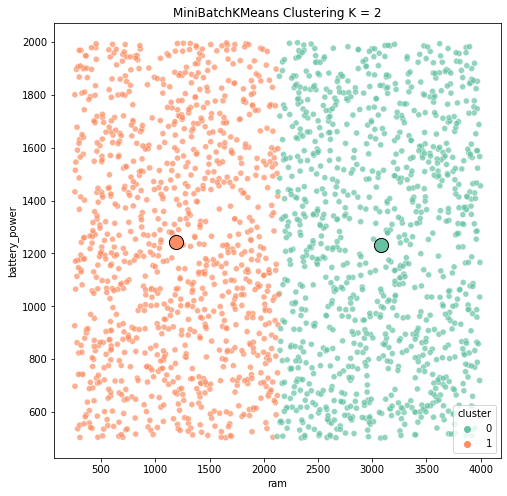

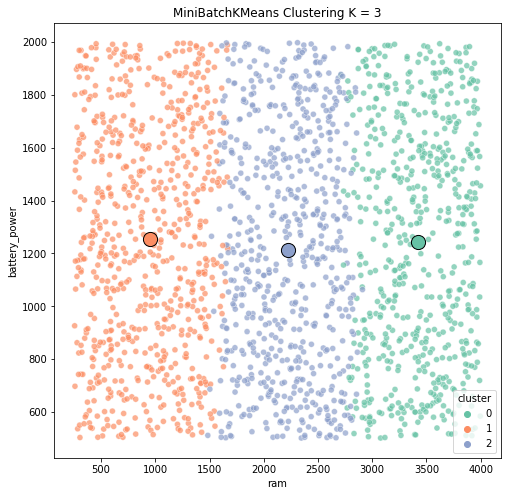

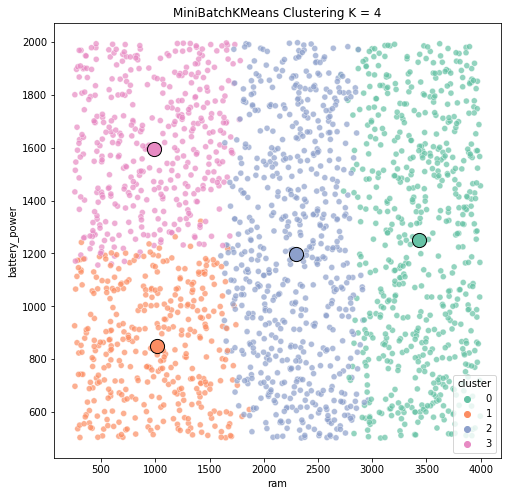

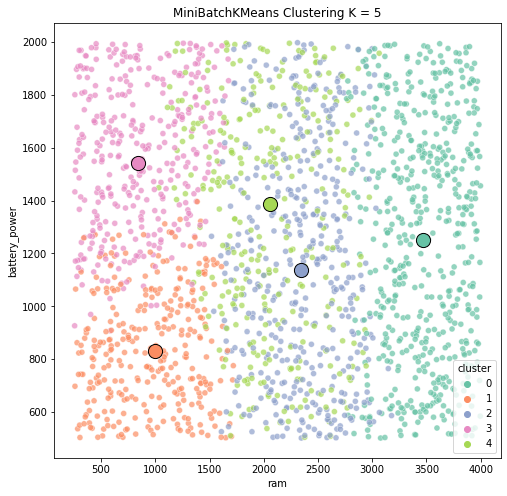

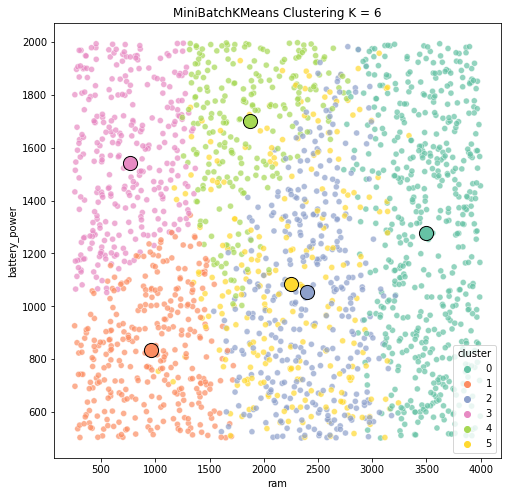

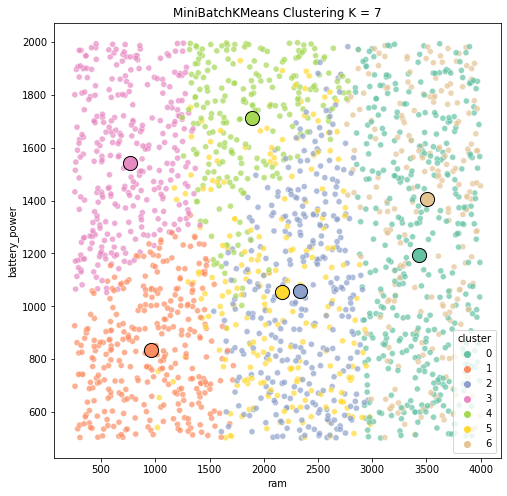

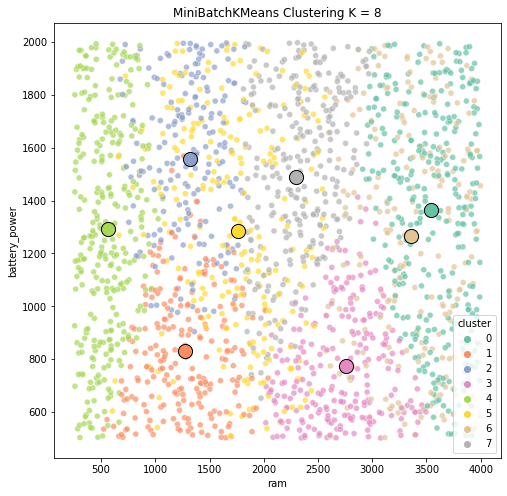

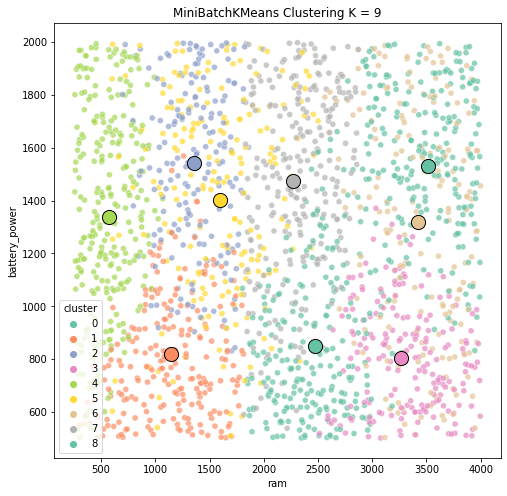

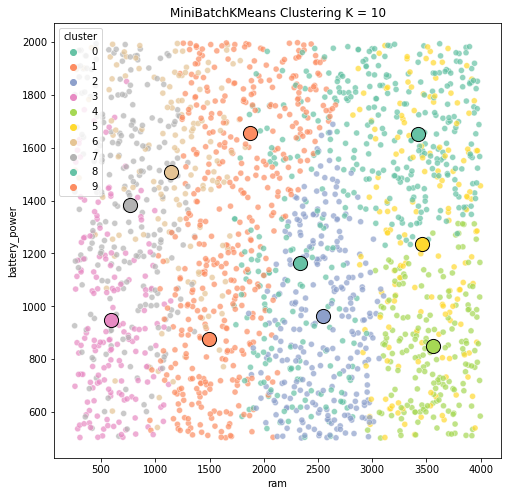

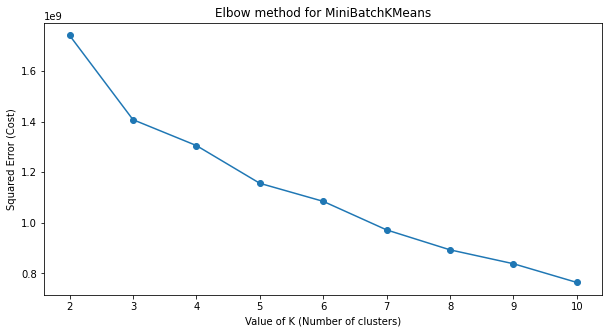

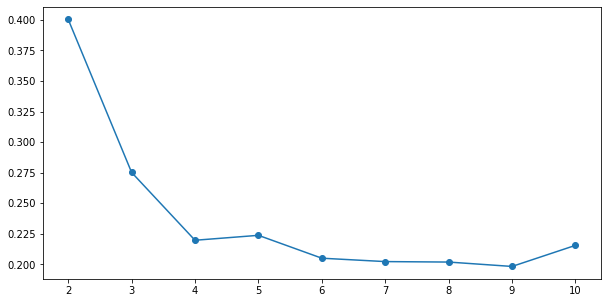

In [35]:
# mini batch k-means
from sklearn.cluster import MiniBatchKMeans

mini_batch_kmeans_results = evaluate_clustering(data, MiniBatchKMeans, 'ram', 'battery_power', show_plots=True)

In [36]:
K, X, y, y_pred = find_optimal_cluster_number(data, MiniBatchKMeans, range(2,11))

# Current highest rand score is 0.7876 when K=6 for MiniBatchKMeans

Silhouette Score: 0.20503877109201105
Homogeneity Score: 0.5136163101889061
Completeness Score: 0.4065456701300448
V-measure Score: 0.4538515858764162
Adjusted Rand Score: 0.37550997599134606
Adjusted Mutual Info Score: 0.45253087380479967
Silhouette Coefficient: 0.20503877109201105
Davies-Bouldin Index: 1.500758972309623
Rand Score: 0.7875805411229329
Calinski-Harabasz index: 878.0727909557999
Fowlkes-Mallows score: 0.5130683620418652


## The best K is 6 for MiniBatchKMeans

# Hierarchical Clustering

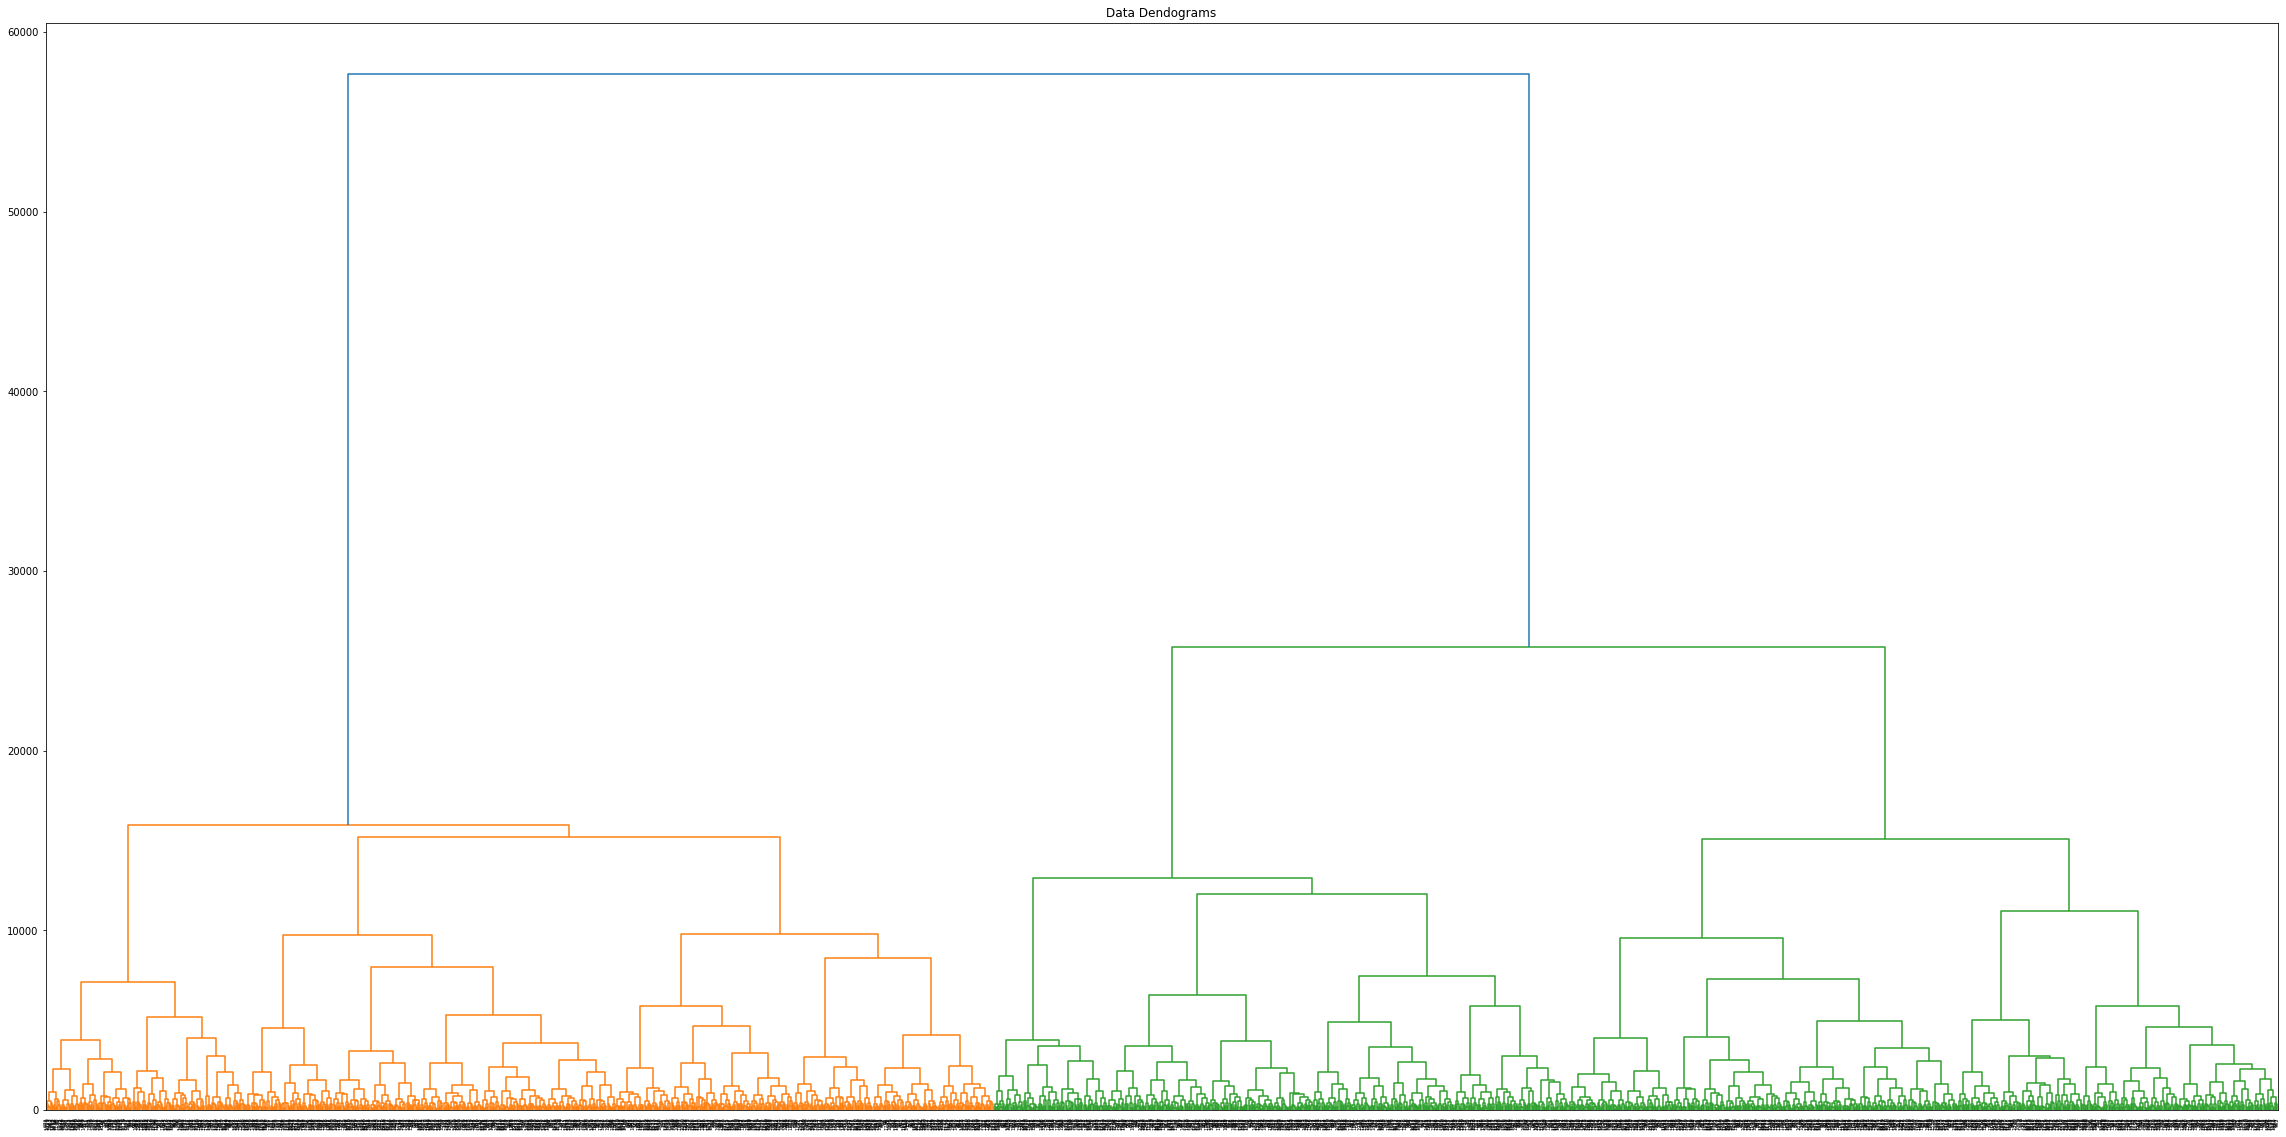

In [37]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(40, 20))
plt.title("Data Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

## Agglomerative Clustering

In [38]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([1, 1, 1, ..., 1, 0, 2], dtype=int64)

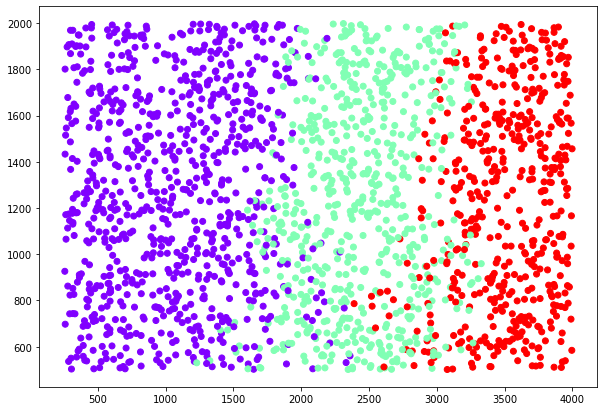

In [39]:
plt.figure(figsize=(10, 7))
plt.scatter(data['ram'], data['battery_power'], c=cluster.labels_, cmap='rainbow')
plt.show()

In [40]:
K, X, y, y_pred = find_optimal_cluster_number(data, AgglomerativeClustering, range(2,11))

# Current highest rand score is 0.7910 when K=6 for AgglomerativeClustering

Silhouette Score: 0.1722118571010201
Homogeneity Score: 0.5168038910349723
Completeness Score: 0.4099883502902339
V-measure Score: 0.45724071752269524
Adjusted Rand Score: 0.385765397198569
Adjusted Mutual Info Score: 0.4559264414622478
Silhouette Coefficient: 0.1722118571010201
Davies-Bouldin Index: 1.5514510029804522
Rand Score: 0.7910031907600611
Calinski-Harabasz index: 818.8072362752433
Fowlkes-Mallows score: 0.5213192249889346


## The best K is 6 for AgglomerativeClustering

In [41]:
from sklearn.cluster import MeanShift
ms = MeanShift(n_jobs=-1).fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 1


In [42]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, random_state=42).fit(X)
labels = gm.predict(X)
y_pred = labels

## The following code is used to plot the results and metrics of the clustering.

In [43]:
def display_metrics(X, labels, y, y_pred):
    plt.figure(figsize=(10, 7))
    plt.scatter(X['ram'], X['battery_power'], c=labels, cmap='rainbow')
    plt.show()
    print(
        f'Silhouette Score: {silhouette_score(X, labels, metric = "euclidean")}')
    print(f'Homogeneity Score: {metrics.homogeneity_score(y, y_pred)}')
    print(
        f'Completeness Score: {metrics.completeness_score(y, y_pred)}')
    print(f'V-measure Score: {metrics.v_measure_score(y, y_pred)}')
    print(
        f'Adjusted Rand Score: {metrics.adjusted_rand_score(y, y_pred)}')
    print(
        f'Adjusted Mutual Info Score: {metrics.adjusted_mutual_info_score(y, y_pred)}')
    print(
        f'Silhouette Coefficient: {metrics.silhouette_score(X, y_pred, metric = "euclidean")}')
    print(
        f'Davies-Bouldin Index: {metrics.davies_bouldin_score(X, y_pred)}')
    print(f'Rand Score: {metrics.rand_score(y, y_pred)}')
    print(
        f'Calinski-Harabasz index: {metrics.calinski_harabasz_score(X, labels)}')
    print(
        f'Fowlkes-Mallows score: {metrics.fowlkes_mallows_score(y_pred, y)}')

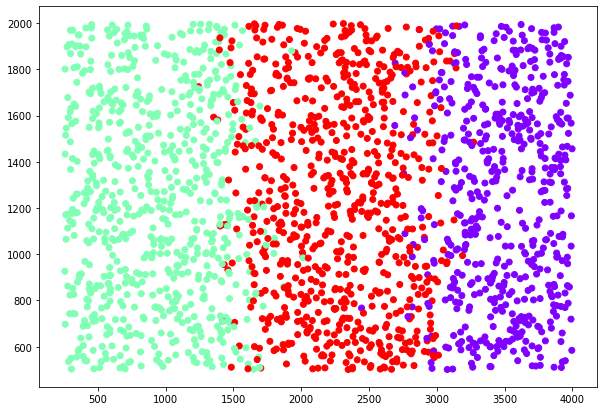

Silhouette Score: 0.2679598523773018
Homogeneity Score: 0.4657784755459439
Completeness Score: 0.5926979839023903
V-measure Score: 0.5216289147235115
Adjusted Rand Score: 0.4575927712708633
Adjusted Mutual Info Score: 0.5210440247309218
Silhouette Coefficient: 0.2679598523773018
Davies-Bouldin Index: 1.302018642680505
Rand Score: 0.7725436666298748
Calinski-Harabasz index: 1402.8014941616893
Fowlkes-Mallows score: 0.6207246450695906


In [44]:
display_metrics(X, labels, y, y_pred)

# Affinity Propagation

In [45]:
from sklearn.cluster import AffinityPropagation

clustering = AffinityPropagation(random_state=42).fit(X)

In [46]:
printmd(f'# Affinity Propagation selected {len(set(labels))} clusters')

# Affinity Propagation selected 3 clusters

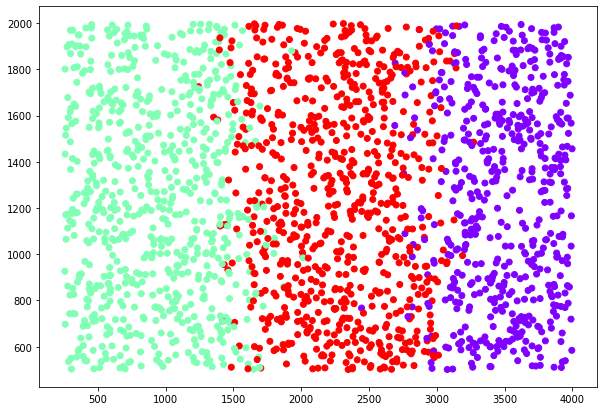

Silhouette Score: 0.2679598523773018
Homogeneity Score: 0.4657784755459439
Completeness Score: 0.5926979839023903
V-measure Score: 0.5216289147235115
Adjusted Rand Score: 0.4575927712708633
Adjusted Mutual Info Score: 0.5210440247309218
Silhouette Coefficient: 0.2679598523773018
Davies-Bouldin Index: 1.302018642680505
Rand Score: 0.7725436666298748
Calinski-Harabasz index: 1402.8014941616893
Fowlkes-Mallows score: 0.6207246450695906


In [47]:
y_pred = labels
display_metrics(X, labels, y, y_pred)
    

# Spectral Clustering

In [48]:
from sklearn.cluster import SpectralClustering


clustering = SpectralClustering(n_clusters=3, random_state=0).fit(X)

labels = clustering.labels_

C:\Users\Gaurav\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


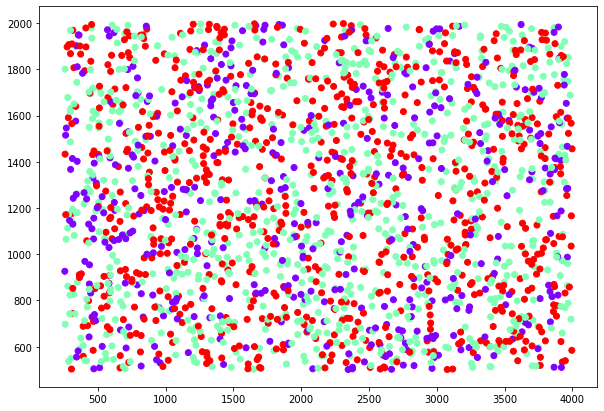

Silhouette Score: -0.008235220909179162
Homogeneity Score: 0.0013148018783903333
Completeness Score: 0.001705803113865132
V-measure Score: 0.001484995981946833
Adjusted Rand Score: 0.00011916047334956788
Adjusted Mutual Info Score: 0.0002536087555551577
Silhouette Coefficient: -0.008235220909179162
Davies-Bouldin Index: 61.21845957662131
Rand Score: 0.5743064324548195
Calinski-Harabasz index: 0.8044780854361567
Fowlkes-Mallows score: 0.2963886109572572


In [49]:
y_pred = labels
display_metrics(X, labels, y, y_pred)

In [50]:
len(np.unique(labels))

3

## The following code is used to test how PCA affects the clustering. I used PCA to reduce the dimensionality of the dataset to 2.

In [51]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [52]:
X_pca.shape

(1988, 2)

In [53]:
labels = KMeans(n_clusters=K, random_state=0, init="k-means++", max_iter=1000, n_init=20).fit(X).labels_

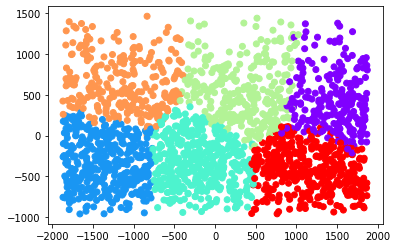

In [54]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow')

In [55]:
print(
    f'Silhouette Score: {silhouette_score(X, labels, metric = "euclidean")}')
print(f'Homogeneity Score: {metrics.homogeneity_score(y, y_pred)}')
print(
    f'Completeness Score: {metrics.completeness_score(y, y_pred)}')
print(f'V-measure Score: {metrics.v_measure_score(y, y_pred)}')
print(
    f'Adjusted Rand Score: {metrics.adjusted_rand_score(y, y_pred)}')
print(
    f'Adjusted Mutual Info Score: {metrics.adjusted_mutual_info_score(y, y_pred)}')
print(
    f'Silhouette Coefficient: {metrics.silhouette_score(X, y_pred, metric = "euclidean")}')
print(
    f'Davies-Bouldin Index: {metrics.davies_bouldin_score(X, y_pred)}')
print(f'Rand Score: {metrics.rand_score(y, y_pred)}')
print(
    f'Calinski-Harabasz index: {metrics.calinski_harabasz_score(X, labels)}')
print(
    f'Fowlkes-Mallows score: {metrics.fowlkes_mallows_score(y_pred, y)}')

Silhouette Score: 0.2285361781224885
Homogeneity Score: 0.0013148018783903333
Completeness Score: 0.001705803113865132
V-measure Score: 0.001484995981946833
Adjusted Rand Score: 0.00011916047334956788
Adjusted Mutual Info Score: 0.0002536087555551577
Silhouette Coefficient: -0.008235220909179162
Davies-Bouldin Index: 61.21845957662131
Rand Score: 0.5743064324548195
Calinski-Harabasz index: 991.3886879411671
Fowlkes-Mallows score: 0.2963886109572572


# PCA gave a worse result than K-Means clustering without PCA.